In [1]:
from models.labeled.conv_generator_v3 import ConvGeneratorV3
from utils.misc import plot_sample
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch

In [2]:
gen = ConvGeneratorV3(None)
gen.load("trained_models/gen_digits4.pt", map_location="cpu")
# gen.load("experiments/2021-03-31_15-49-56/model_checkpoints/generator30.p", map_location="cpu")
gen.eval()

ConvGeneratorV3(
  (tokens): Embedding(10, 20)
  (linear): Sequential(
    (0): Linear(in_features=120, out_features=6272, bias=False)
    (1): ReLU()
  )
  (conv): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1), bias=False)
    (2): ReLU()
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (8): Tanh()
  )
)

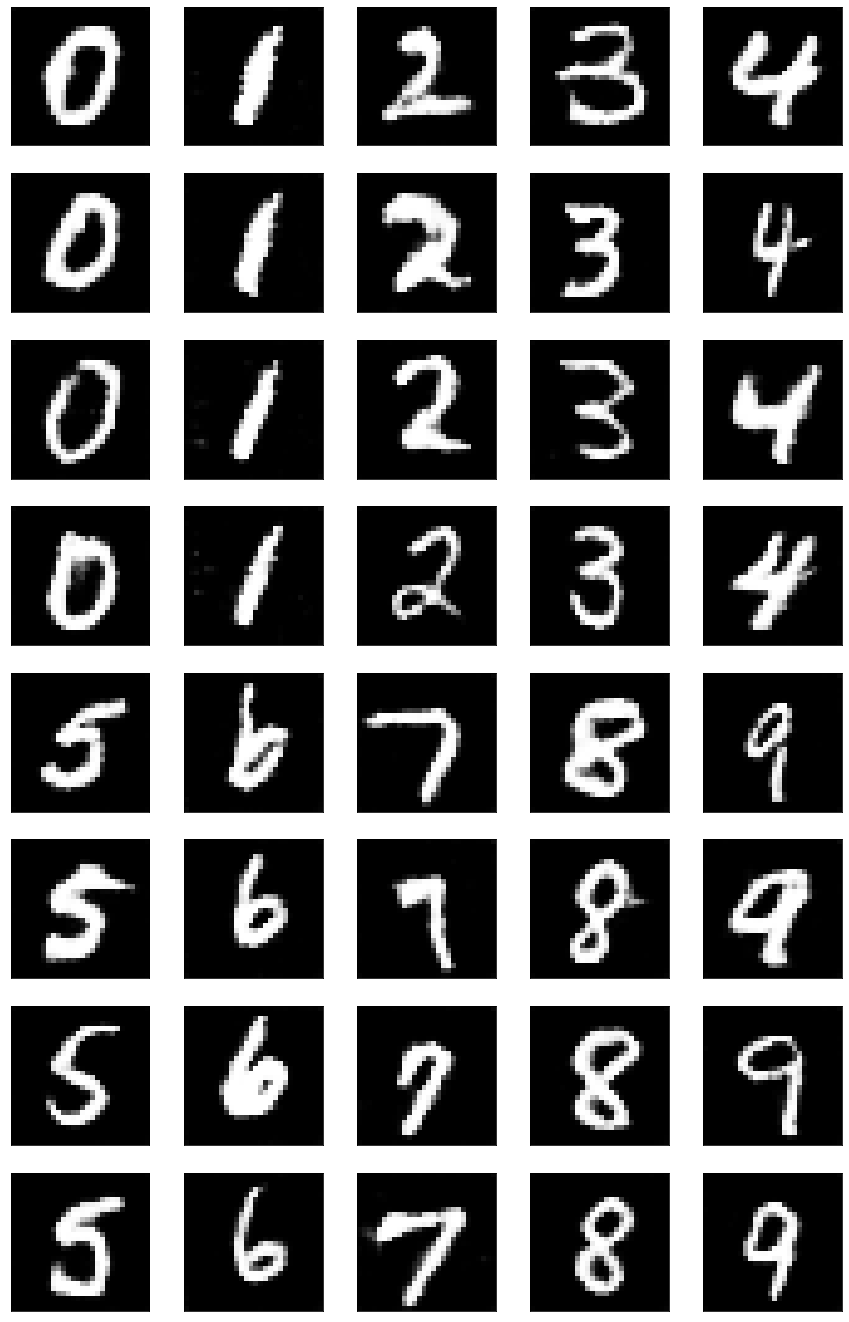

In [3]:
digits = torch.tensor([0, 1, 2, 3, 4] * 4 + [5, 6, 7, 8, 9] * 4).long()
X = gen.generate_batch_with_labels(digits)
fig, axes = plt.subplots(figsize=(15, 24), nrows=8, ncols=5, facecolor="white")
for sample, ax in zip(X, axes.ravel()):
    plot_sample(ax, sample)
    ax.set_xticks([])
    ax.set_yticks([])